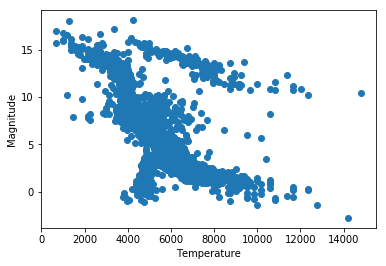

In [5]:
from pylab import scatter, xlabel, ylabel, xlim, ylim, show
from numpy import loadtxt
data=loadtxt("stars.txt",float)
x=data[:,0]
y=data[:,1]
scatter(x,y)
xlabel("Temperature")
ylabel("Magnitude")
#xlim(13000,0)
#ylim(20,-5)
show()

# Example 3.1
Let $r_i=\sqrt{(x-x_i)^2+(y-y_i)^2}$ be the center of a circle centered at $(x_i,y_i)$. A pebble dropped at this location would create circular sine waves of the form $\chi(x,y)=\chi_o \sin kr_i$, where $k=2\pi/\lambda$ We will add two such waves together to get an interference pattern.

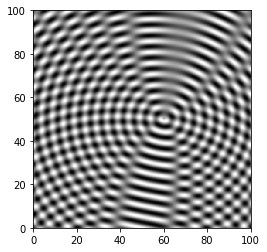

In [6]:
from numpy import sqrt, sin, pi
from numpy import empty
from pylab import imshow,gray,show,jet

wavelength=5.0
k=2*pi/wavelength
xi0=1.0
separation=20.0
side=100.           # length of square in cm
points=500          # num of grid points along a side
spacing=side/points #sampling points

#positions of circles
x1=side/2+separation/2
y1=side/2
x2=side/2-separation/2
y2=-side/2

#make empty array to store points
xi=empty([points,points],float)

#calculate points
for i in range(points):
    y=spacing*i
    for j in range(points):
        x=spacing*j
        r1=sqrt((x-x1)**2+(y-y1)**2)
        r2=sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j]=xi0*sin(k*r1)+xi0*sin(k*r2)
        
#make plot
imshow(xi, origin="lower", extent=[0,side,0,side])
gray()
show()
        


In [5]:
from vpython import display,sphere,canvas
L=5
R=0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            pos=[i,j,k]
            sphere(pos,radius=R)

Exception ignored in: <bound method standardAttributes.__del__ of <vpython.vpython.sphere object at 0x1086be390>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/vpython/vpython.py", line 1135, in __del__
    super(standardAttributes, self).__del__()
  File "/anaconda3/lib/python3.6/site-packages/vpython/vpython.py", line 354, in __del__
    cmd = {"cmd": "delete", "idx": self.idx}
AttributeError: 'sphere' object has no attribute 'idx'


TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
from vpython import *

scene.caption = """Right button drag or Ctrl-drag to rotate "camera" to view scene.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
     On a two-button mouse, middle is left + right.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""

side = 4.0
thk = 0.3
s2 = 2*side - thk
s3 = 2*side + thk
wallR = box (pos=vector( side, 0, 0), size=vector(thk, s2, s3),  color = color.red)
wallL = box (pos=vector(-side, 0, 0), size=vector(thk, s2, s3),  color = color.red)
wallB = box (pos=vector(0, -side, 0), size=vector(s3, thk, s3),  color = color.blue)
wallT = box (pos=vector(0,  side, 0), size=vector(s3, thk, s3),  color = color.blue)
wallBK = box(pos=vector(0, 0, -side), size=vector(s2, s2, thk), color = color.gray(0.7))

ball = sphere (color = color.green, radius = 0.4, make_trail=True, retain=100, 
               trail_color=color.cyan)
ball.mass = 1.0
ball.p = vector(-0.15, -0.23, +0.27)
side = side - thk*0.5 - ball.radius

dt = 0.5
t = 0.0
while True:
    rate(100)
    t = t + dt
    ball.pos = ball.pos + (ball.p/ball.mass)*dt
    if not (side > ball.pos.x > -side):
        ball.p.x = -ball.p.x
    if not (side > ball.pos.y > -side):
        ball.p.y = -ball.p.y
    if not (side > ball.pos.z > -side):
        ball.p.z = -ball.p.z

In [ ]:
from vpython import *

# Bruce Sherwood

N = 3 # N by N by N array of atoms
# Surrounding the N**3 atoms is another layer of invisible fixed-position atoms
# that provide stability to the lattice.
k = 1
m = 1
spacing = 1
atom_radius = 0.3*spacing
L0 = spacing-1.8*atom_radius
V0 = pi*(0.5*atom_radius)**2*L0 # initial volume of spring
scene.center = 0.5*(N-1)*vector(1,1,1)
dt = 0.04*(2*pi*sqrt(m/k))
axes = [vector(1,0,0), vector(0,1,0), vector(0,0,1)]

scene.caption= """A model of a solid represented as atoms connected by interatomic bonds.

Right button drag or Ctrl-drag to rotate "camera" to view scene.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
  On a two-button mouse, middle is left + right.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""

class crystal:
        
    def __init__(self,  N, atom_radius, spacing, momentumRange ):
        self.atoms = []
        self.springs = []
        
        # Create (N+2)^3 atoms in a grid; the outermost atoms are fixed and invisible
        for z in range(-1,N+1,1):
            for y in range(-1,N+1,1):
                for x in range(-1,N+1,1):
                    atom = sphere()
                    atom.pos = vector(x,y,z)*spacing
                    atom.radius = atom_radius
                    atom.color = vector(0,0.58,0.69)
                    if 0 <= x < N and 0 <= y < N and 0 <= z < N:
                        p = vec.random()
                        atom.momentum = momentumRange*p
                    else:
                        atom.visible = False
                        atom.momentum = vec(0,0,0)
                    atom.index = len(self.atoms)
                    self.atoms.append( atom )
        for atom in self.atoms:
            if atom.visible:
                if atom.pos.x == 0:
                    self.make_spring(self.atoms[atom.index-1], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+1], True)
                elif atom.pos.x == N-1:
                    self.make_spring(atom, self.atoms[atom.index+1], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+1], True)

                if atom.pos.y == 0:
                    self.make_spring(self.atoms[atom.index-(N+2)], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], True)
                elif atom.pos.y == N-1:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)], True)
                    
                if atom.pos.z == 0:
                    self.make_spring(self.atoms[atom.index-(N+2)**2], atom, False)
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], True)
                elif atom.pos.z == N-1:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], False)
                else:
                    self.make_spring(atom, self.atoms[atom.index+(N+2)**2], True)
    
    # Create a grid of springs linking each atom to the adjacent atoms
    # in each dimension, or to invisible motionless atoms
    def make_spring(self, start, end, visible):
        spring = helix()
        spring.pos = start.pos
        spring.axis = end.pos-start.pos
        spring.visible = visible
        spring.thickness = 0.05
        spring.radius = 0.5*atom_radius
        spring.length = spacing
        spring.start = start
        spring.end = end
        spring.color = color.orange
        self.springs.append(spring)

c = crystal(N, atom_radius, spacing, 0.1*spacing*sqrt(k/m))

while True:
    rate(60)
    for atom in c.atoms:
        if atom.visible:
            atom.pos = atom.pos + atom.momentum/m*dt
    for spring in c.springs:
        spring.axis = spring.end.pos - spring.start.pos
        L = mag(spring.axis)
        spring.axis = spring.axis.norm()
        spring.pos = spring.start.pos+0.5*atom_radius*spring.axis
        Ls = L-atom_radius
        spring.length = Ls
        Fdt = spring.axis * (k*dt * (1-spacing/L))
        if spring.start.visible:
            spring.start.momentum = spring.start.momentum + Fdt
        if spring.end.visible:
            spring.end.momentum = spring.end.momentum - Fdt
